# Validation

## Train/Test Split in sklearn

In [7]:
#!/usr/bin/python

""" 
PLEASE NOTE:
The api of train_test_split changed and moved from sklearn.cross_validation to
sklearn.model_selection(version update from 0.17 to 0.18)

The correct documentation for this quiz is here: 
http://scikit-learn.org/0.17/modules/cross_validation.html
"""

from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()
features = iris.data
labels = iris.target

###############################################################
### YOUR CODE HERE
###############################################################

### import the relevant code and make your train/test split
### name the output datasets features_train, features_test,
### labels_train, and labels_test
# PLEASE NOTE: The import here changes depending on your version of sklearn
# from sklearn import cross_validation # for version 0.17
# For version 0.18
from sklearn.model_selection import train_test_split



### set the random_state to 0 and the test_size to 0.4 so
### we can exactly check your result
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=0, test_size=0.4)
from sklearn.svm import SVC

###############################################################
# DONT CHANGE ANYTHING HERE
clf = SVC(kernel="linear", C=1.)
clf.fit(features_train, labels_train)

print(clf.score(features_test, labels_test))
##############################################################
def submitAcc():
    return clf.score(features_test, labels_test)

0.9666666666666667


In [13]:
# just a helper function for easier youtube call
def strip_url(url):
    return url.replace('https://youtu.be/','')

## Where to use training vs. testing data 1

We fit the training-features to PCA, instead of testing data. Because we only want to be looking for patterns in the training data right now.

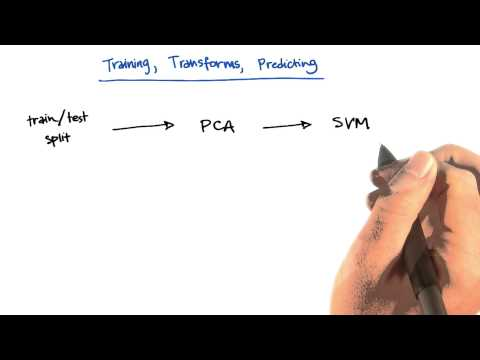

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/NvgWKf-iBsw'))

## Where to use training vs. testing data 2

Set the training of support vector classifier

In order to use a principal components when I'm training my support vector classifier, I need to transform my training data set into the correct representation.

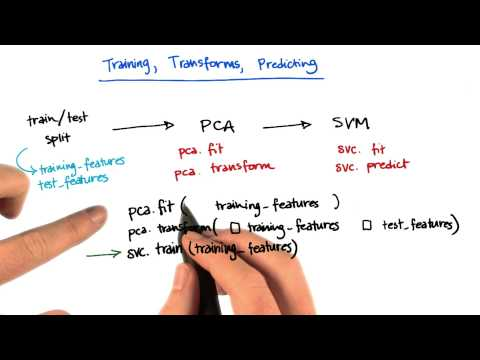

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/K4gGK4ScT7M'))

svc.train(training_features) should be svc.fit(training_features)

## Where to use training vs. testing data 3

When support vector classifier is done, including the principal components transformation. Now, we move on to testing.

We do not refitting our PCA on our test features. We want to be very consistent between what we’ve done with the training features, and what we’ll be doing with the testing features here. So that means using the same principal components that we found in the training features and representing our testing features using those principal components.

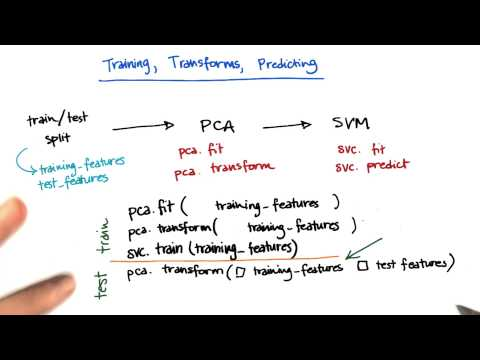

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/-XfG5hXveiE'))

## Where to use training vs. testing data 4

We use test_features to the svc.predict.

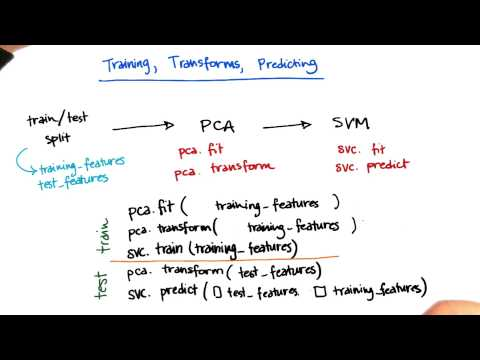

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/3RuKO3PQWg0'))

## K-Fold Cross Validation

The problem is how we know the fraction of test and training data to get the best learning results. When you add more data to the test set, you lose the training set. This is a trade-off.

So, this is where cross validation comes into the picture. The basic idea is that you partition the data set into k bins of equal size. For example, if you have 200 data points and you have 10 bins. So you will have 20 data points in each of the 10 bins.

Whereas in the work that Katie showed us, we just pick one of those bins as a testing bin and the other then as a training bin. In k-fold cross validation, we run k separate learning experiments. In each of those we pick one of those k subsets as your testing set. The remaining k minus one bins are put together into the training set, then we train our machine learning algorithm and we’ll test the performance on the testing set.

The key thing in cross validation is we run this multiple times. In this case ten times, and then we average the ten different testing set performances for the ten different hold out sets, we average the test results from those k experiments. 

This takes more compute time because we now have to run k separate learning experiments, but the assessment of the learning algorithm will be more accurate. 

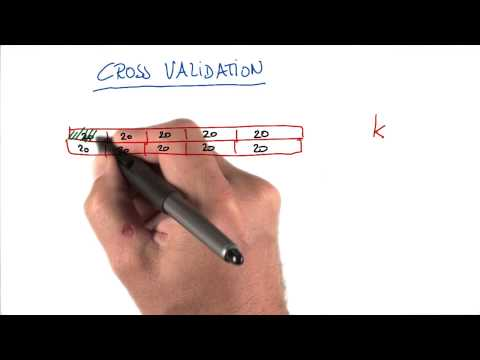

In [17]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/TIgfjmp-4BA'))

If we want to minimize the run time, we might as well get the benefit of 10-fold cross validation, to have a better assessment of what’s going on. But it’s not clear this, either one could be correct.

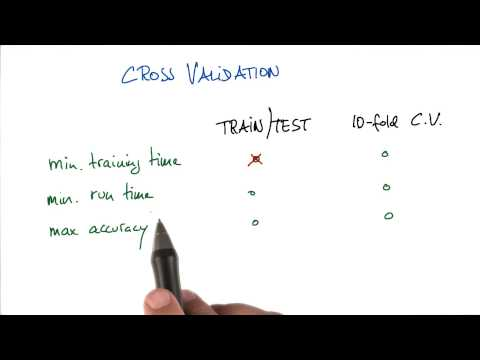

In [18]:
# Answer
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/ADNFKiAjmWA'))

## K-Fold CV in sklearn

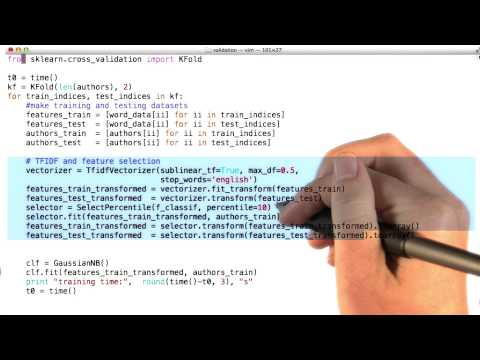

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/QSYMwFbE7PA'))

There's a simple way to randomize the events in sklearn k-fold CV: set the shuffle flag to true.

Then you'd go from something like this:

cv = KFold( len(authors), 2 )

To something like this:

cv = KFold( len(authors), 2, shuffle=True )

## Practical Advice for K-Fold in sklearn

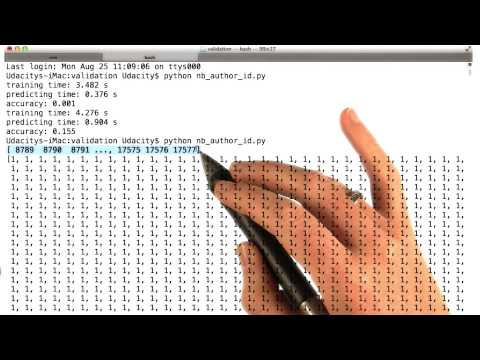

In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/COVRSk0GDEE'))

If our original data comes in some sort of sorted fashion, then we will want to first shuffle the order of the data points before splitting them up into folds, or otherwise randomly assign data points to each fold. If we want to do this using `KFold()`, then we can add the "shuffle = True" parameter when setting up the cross-validation object.

If we have concerns about class imbalance, then we can use the `StratifiedKFold()` class instead. Where `KFold()` assigns points to folds without attention to output class, `StratifiedKFold()` assigns data points to folds so that each fold has approximately the same number of data points of each output class. This is most useful for when we have imbalanced numbers of data points in your outcome classes (e.g. one is rare compared to the others). For this class as well, we can use "shuffle = True" to shuffle the data points' order before splitting into folds.

## GridSearchCV in sklearn
GridSearchCV is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. The beauty is that it can work through many combinations in only a couple extra lines of code.

Here's an example from the sklearn documentation(opens in a new tab):

`parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}`
`svr = svm.SVC()`
`clf = grid_search.GridSearchCV(svr, parameters)`
`clf.fit(iris.data, iris.target)`

Let's break this down line by line.

`parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}`
A dictionary of the parameters, and the possible values they may take. In this case, they're playing around with the kernel (possible choices are 'linear' and 'rbf'), and C (possible choices are 1 and 10).

Then a 'grid' of all the following combinations of values for (kernel, C) are automatically generated:

| ('rbf', 1) | ('rbf', 10)| |- | ('linear', 1) | ('linear', 10) |

Each is used to train an SVM, and the performance is then assessed using cross-validation.

`svr = svm.SVC()`
This looks kind of like creating a classifier, just like we've been doing since the first lesson. But note that the "clf" isn't made until the next line--this is just saying what kind of algorithm to use. Another way to think about this is that the "classifier" isn't just the algorithm in this case, it's algorithm plus parameter values. Note that there's no monkeying around with the kernel or C; all that is handled in the next line.

`clf = grid_search.GridSearchCV(svr, parameters)`
This is where the first bit of magic happens; the classifier is being created. We pass the algorithm (svr) and the dictionary of parameters to try (parameters) and it generates a grid of parameter combinations to try.

`clf.fit(iris.data, iris.target)`
And the second bit of magic. The fit function now tries all the parameter combinations, and returns a fitted classifier that's automatically tuned to the optimal parameter combination. You can now access the parameter values via `clf.best_params_`.

## GridSearchCV in sklearn

Refer to the eigenfaces code, which you can find [here](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html). **What parameters of the SVM are being tuned with GridSearchCV?**

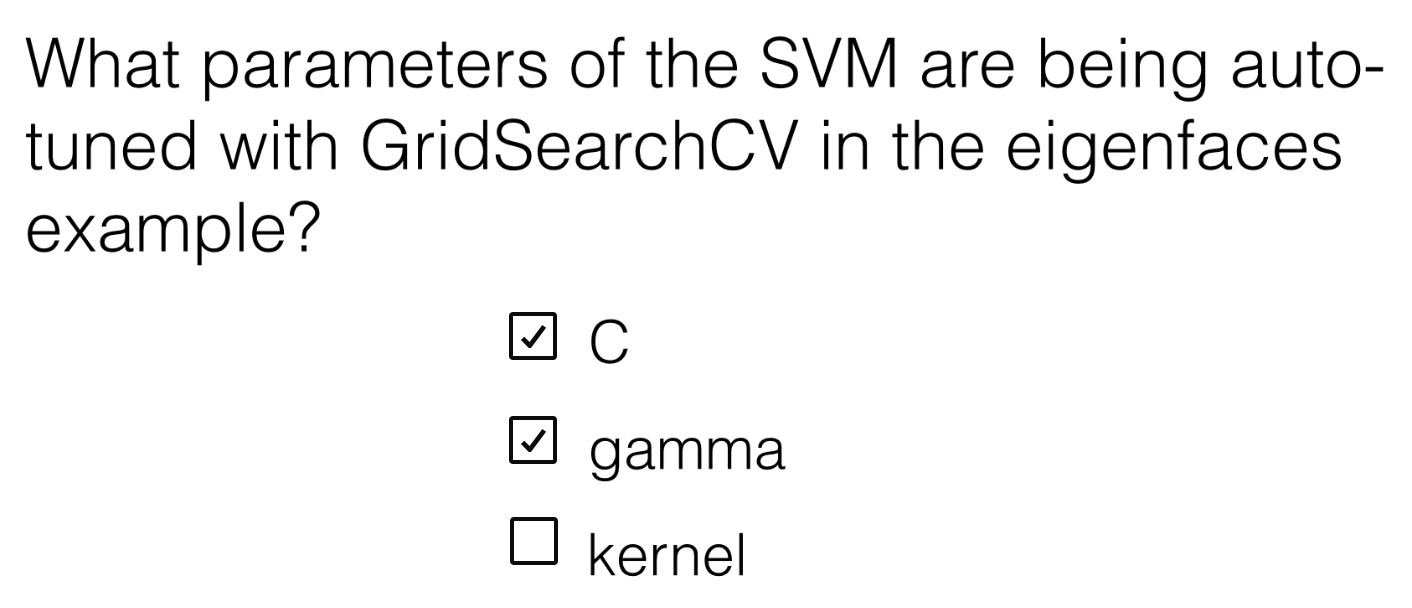

## Validation Mini-Project
Udacity: In this mini-project, you'll start from scratch in making a training-testing split in the data. This will be the first step toward your final project, of building a POI identifier.

In [24]:
#!/usr/bin/python


"""
    Starter code for the validation mini-project.
    The first step toward building your POI identifier!

    Start by loading/formatting the data

    After that, it's not our code anymore--it's yours!
"""
import os
import joblib
import sys
sys.path.append(os.path.abspath("../tools/"))
from feature_format import featureFormat, targetFeatureSplit

data_dict = joblib.load(open("../final_project/final_project_dataset.pkl", "rb") )

### first element is our labels, any added elements are predictor
### features. Keep this the same for the mini-project, but you'll
### have a different feature list when you do the final project.
features_list = ["poi", "salary"]

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)



### it's all yours from here forward!  

## Your First (Overfit) POI Identifier

You’ll start by building the simplest imaginable (unvalidated) POI identifier. The starter code (validation/validate_poi.py) for this lesson is pretty bare--all it does is read in the data, and format it into lists of labels and features. Create a decision tree classifier (just use the default parameters), train it on all the data (you will fix this in the next part!), and print out the accuracy. THIS IS AN OVERFIT TREE, DO NOT TRUST THIS NUMBER! Nonetheless, **what’s the accuracy?**

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def classify(features_train, labels_train):
    clf = DecisionTreeClassifier()
    clf.fit(features_train, labels_train)
    
    return clf

# train
clf = classify(features, labels) #training for all data

pred = clf.predict(features)

acc = accuracy_score(pred, labels)

print({"acc": acc})

{'acc': 0.9894736842105263}


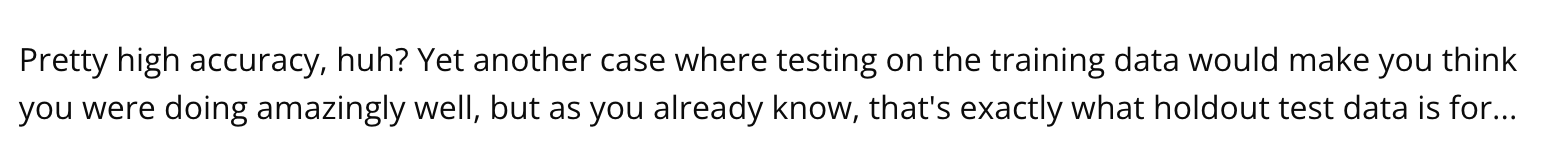

## Deploying a Training/Testing Regime

Now you’ll add in training and testing, so that you get a trustworthy accuracy number. Use the train_test_split validation available in sklearn.cross_validation; hold out 30% of the data for testing and set the random_state parameter to 42 (random_state controls which points go into the training set and which are used for testing; setting it to 42 means we know exactly which events are in which set, and can check the results you get). **What’s your updated accuracy?**

In [42]:
import sklearn
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

def TreeAccuracy(features_train, features_test, labels_train, labels_test):
    clf = DecisionTreeClassifier()
    clf.fit(features_train, labels_train)
    
    pred = clf.predict(features_test)
    
    acc = accuracy_score(pred, labels_test)
    
    return acc

acc = TreeAccuracy(features_train, features_test, labels_train, labels_test)

print({"acc": acc})

{'acc': 0.6896551724137931}
